In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

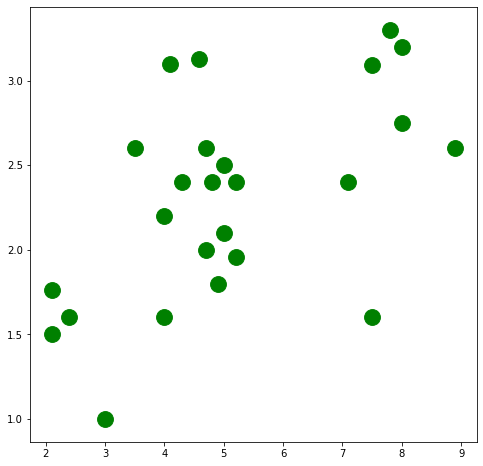

In [3]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

In [4]:
x = torch.from_numpy(x_train) 
y = torch.from_numpy(y_train)

In [5]:
x.size()

torch.Size([25, 1])

- inp - input dimension
- hidden - hidden dimension
- out - output dimension

In [7]:
inp = 1
hidden = 5
out = 1

#### Creating model using nn.Sequential()

- Use the nn package to define our model as a sequence of layers. 
- nn.Sequential s a Module which contains other Modules, and applies them in sequence to produce its output https://pytorch.org/docs/0.3.1/nn.html#sequential.
- Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html.

In [8]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

the nn package also contains definitions of popular loss functions; in thiscase we will use <b>Mean Squared Error (MSE) </b> as our loss function.

In [9]:
loss_fn = torch.nn.MSELoss(reduction='sum')

- Forward pass:  
compute predicted y by passing x to the model. Module objects override the __call__ operator so you can call them like functions. When doing so you pass a Tensor of input data to the Module and it produces a Tensor of output data.


- loss:
We pass Tensors containing the predicted and true values of y, and the loss function returns a Tensor containing the loss.


- model.zero_grad():
Zero the gradients before running the backward pass


- Backward pass: 
compute gradient of the loss with respect to all the learnable parameters of the model. Internally, the parameters of each Module are stored in Tensors with requires_grad=True, so this call will compute gradients for
all learnable parameters in the model


- update the weights manually using gradient descent. Each parameter is a Tensor, so we can access its gradients like we did before.

In [12]:
learning_rate = 1e-4

for i in range(500):
    
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if(i%50==0):
        print(i, loss.item())
        print(model.parameters())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 6.133114814758301
<generator object Module.parameters at 0x00000169D41D6570>
50 6.126639366149902
<generator object Module.parameters at 0x00000169D41D6570>
100 6.121129989624023
<generator object Module.parameters at 0x00000169D41D6570>
150 6.11637020111084
<generator object Module.parameters at 0x00000169D41D6570>
200 6.1121907234191895
<generator object Module.parameters at 0x00000169D41D6570>
250 6.108445167541504
<generator object Module.parameters at 0x00000169D41D6570>
300 6.105017185211182
<generator object Module.parameters at 0x00000169D41D6570>
350 6.101813316345215
<generator object Module.parameters at 0x00000169D41D6570>
400 6.09874963760376
<generator object Module.parameters at 0x00000169D41D6570>
450 6.095760822296143
<generator object Module.parameters at 0x00000169EDCB0570>


In [13]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.2265],
        [1.8044],
        [2.7218],
        [2.6510],
        [2.1557],
        [2.7749],
        [2.9695],
        [2.3149],
        [2.2070],
        [1.7467],
        [2.8103],
        [2.2795],
        [2.7218],
        [2.2795],
        [2.1026],
        [2.8103],
        [2.3149],
        [2.2618],
        [1.9198],
        [2.2265],
        [2.1026],
        [2.2442],
        [2.0142],
        [1.7467],
        [2.1203]], grad_fn=<AddmmBackward>)

In [14]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2264628],
       [1.8043973],
       [2.7218013],
       [2.6510386],
       [2.1557002],
       [2.774873 ],
       [2.96947  ],
       [2.3149164],
       [2.2070034],
       [1.746702 ],
       [2.8102543],
       [2.2795348],
       [2.7218013],
       [2.2795348],
       [2.1026285],
       [2.8102543],
       [2.3149164],
       [2.2618444],
       [1.9197882],
       [2.2264628],
       [2.1026285],
       [2.2441535],
       [2.0141752],
       [1.746702 ],
       [2.1203191]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

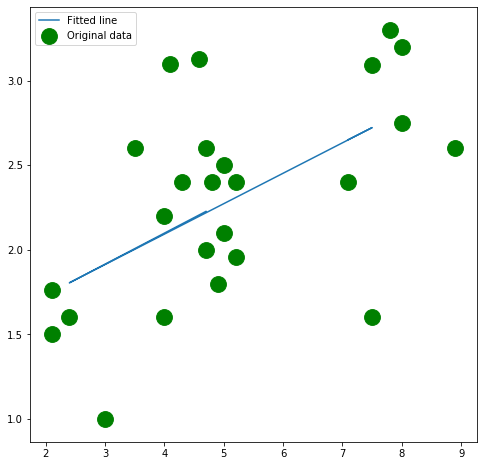

In [21]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train[:4], predicted[:4], label = 'Fitted line ')

plt.legend() 

plt.show()

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters (with torch.no_grad() or .data to avoid tracking history in autograd).

#### The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

Use the nn package to define our model and loss function

In [22]:
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

loss_fn = torch.nn.MSELoss(reduction='sum')

- Use the optim package to define an Optimizer that will update the weights of the model for us
- Here we will use SGD;the optim package contains many other optimization algorithms.
- The first argument to the SGD constructor tells the optimizer which Tensors it should update.

Before the backward pass, use the optimizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model). This is because by default, gradients are accumulated in buffers( i.e, not overwritten) whenever .backward() is called.

Calling the step function on an Optimizer makes an update to its parameters

In [24]:
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(500):
    
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if(i%50==0):
        print(i, loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

0 8.702994346618652
50 8.51904582977295
100 8.347902297973633
150 8.195100784301758
200 8.054549217224121
250 7.922418117523193
300 7.798224925994873
350 7.681527137756348
400 7.571909427642822
450 7.4689860343933105


#### Get the predicted values

In [25]:
predicted_in_tensor = model(x)
predicted_in_tensor

tensor([[2.1104],
        [1.4509],
        [2.9133],
        [2.7986],
        [1.9957],
        [2.9993],
        [3.3147],
        [2.2538],
        [2.0789],
        [1.3649],
        [3.0566],
        [2.1964],
        [2.9133],
        [2.1964],
        [1.9097],
        [3.0566],
        [2.2538],
        [2.1678],
        [1.6230],
        [2.1104],
        [1.9097],
        [2.1391],
        [1.7663],
        [1.3649],
        [1.9384]], grad_fn=<AddmmBackward>)

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [26]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.11041  ],
       [1.4509299],
       [2.9132557],
       [2.7985632],
       [1.9957179],
       [2.9992747],
       [3.3146784],
       [2.2537754],
       [2.07887  ],
       [1.3649106],
       [3.056621 ],
       [2.1964293],
       [2.9132557],
       [2.1964293],
       [1.9096987],
       [3.056621 ],
       [2.2537754],
       [2.1677563],
       [1.6229682],
       [2.11041  ],
       [1.9096987],
       [2.1390834],
       [1.7663335],
       [1.3649106],
       [1.9383717]], dtype=float32)

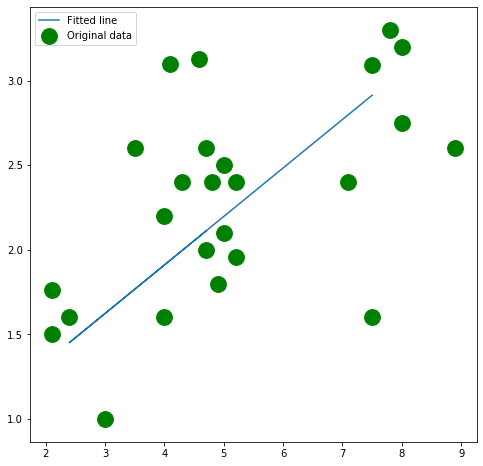

In [34]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train[:3], predicted[:3], label = 'Fitted line ')

plt.legend() 

plt.show()

In [33]:
x_train[:3], predicted[:3]

(array([[4.7],
        [2.4],
        [7.5]], dtype=float32),
 array([[2.11041  ],
        [1.4509299],
        [2.9132557]], dtype=float32))